In [1]:
import numpy as np
import pandas as pd
from os import path

data_directory = "synData28June"
lotti_fn = "export_lotti_veneto_2016_2018_giulio.csv"
vincitori_fn = "export_vincitori_veneto_2016_2018_giulio.csv"

lotti = pd.read_csv(path.join(data_directory, lotti_fn))
vincitori = pd.read_csv(path.join(data_directory, vincitori_fn))

In [2]:
import string
hash_to_letter = dict()

for i, centrale_committenza in enumerate(lotti.md5.unique()):
    hash_to_letter[centrale_committenza] = string.ascii_uppercase[i]
lotti = lotti.replace({"md5": hash_to_letter})

let us focus on a single market as defined by the *common procurement vocabulary*

In [3]:
lotti["id_cpv"].mode()

0    3121.0
Name: id_cpv, dtype: float64

In [4]:
B_market = lotti[lotti.id_cpv == lotti.id_cpv.mode().values[0]]

In [5]:
np.sum(B_market.importo.isna())

0

In [6]:
th = 6e6
print(f"importo $\in$ ({B_market.importo.max()}, {B_market.importo.min()})")
print(f"sample percentage {np.sum(B_market.importo < th) / len(B_market) * 100 :.2f}")

importo $\in$ (4498870906.88, 0.01)
sample percentage 98.51


<AxesSubplot:xlabel='importo', ylabel='Count'>

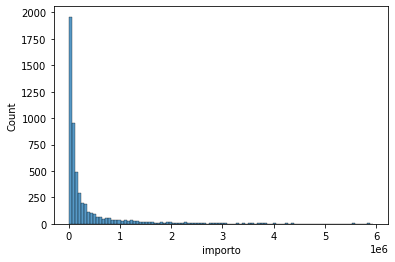

In [7]:
import seaborn as sns

sns.histplot(B_market.importo[B_market.importo < th], bins = 100)

<AxesSubplot:xlabel='importo', ylabel='Count'>

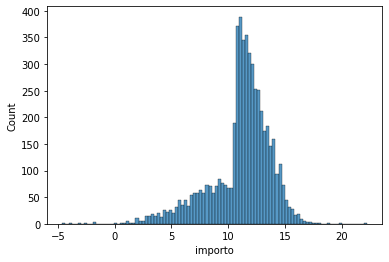

In [8]:
sns.histplot(np.log(B_market.importo), bins=100)

<AxesSubplot:xlabel='importo', ylabel='Count'>

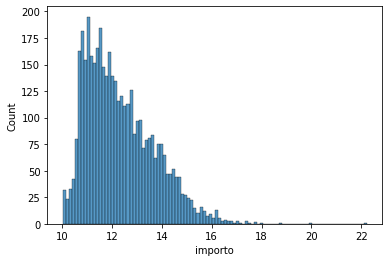

In [9]:
cut_off = 10
sns.histplot(np.log(B_market.importo)[np.log(B_market.importo)>cut_off], bins=100)

In [10]:
B_market[np.log(B_market.importo)>cut_off]

,id_lotto,oggetto,id_scelta_contraente,id_cpv,importo,importo_base_asta,importo_liquidato,data_inizio,data_fine,data_inferita_calcolata,id_lsf,id_mod_realizz,id_forma_giuridica,md5
326,1455175,GARA REGIONALE FARMACI 2018/2020 - CIG DERIVAT...,26.0,3121.0,2260258.98,NaN,NaN,2018-04-01,2020-04-30,True,3.0,14.0,135,B
1192,4828381,CRAV APPALTO SPECIFICO FORNITURA FARMACI AZIEN...,26.0,3121.0,352402.05,NaN,97671.07,2018-05-01,2020-12-31,True,3.0,14.0,135,B
1614,11849649,GR FARMACI 2018/2020 - II^ PROCEDURA - CIG DER...,26.0,3121.0,87909.35,NaN,NaN,2018-05-24,2020-04-30,True,3.0,14.0,135,B
1920,17271979,GARA REGIONALE FARMACI 2018/2020 - CIG DERIEVA...,26.0,3121.0,1743672.00,NaN,NaN,2018-04-01,2020-04-30,True,3.0,14.0,135,B
2051,887940180,GARA REGIONALE FARMACI - 2^ PROCEDURA - DETERM...,26.0,3121.0,1151361.00,NaN,NaN,2018-07-11,2020-04-30,True,3.0,14.0,135,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945265,887903314,FORNITURA FARMACO KETAMINA MOLT LOTTO 1340/A -...,26.0,3121.0,56296.00,NaN,13701.56,2018-05-01,2021-10-31,True,3.0,14.0,135,B
945266,887919610,FORNITURA FARMACI LOTTO 805/A - CEFTRIAXONE ...,26.0,3121.0,94349.00,NaN,32530.10,2018-05-01,2021-10-31,True,3.0,14.0,135,B
945267,887903762,FORNITURA FARMACI LOTTO 984/B - SUBCUVIA - IM...,26.0,3121.0,245112.00,NaN,46833.90,2018-05-01,2021-10-31,True,3.0,14.0,135,B
945268,887904257,FORNITURA FARMACO LUAN LOTTO 1354/A - IMPRESA ...,26.0,3121.0,48930.00,NaN,15295.59,2018-05-01,2021-10-31,True,3.0,14.0,135,B


analisi di questo specifico mercato

In [12]:
market = B_market[["importo", "importo_liquidato", "id_mod_realizz", "id_forma_giuridica"]]
market = market.fillna(0)

In [13]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

detector = IsolationForest()

y = detector.fit_predict(market)

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X = pca.fit_transform(market)

In [15]:
set(y)

{-1, 1}

/var/folders/zw/jt2ycyfx58j5m2lkspywwvnm0000gn/T/ipykernel_3094/597447282.py:5: RuntimeWarning: invalid value encountered in log
  plt.scatter(np.log(X[:, 0][y==flag]), np.log(X[:, 1][y==flag]), alpha=.6, color=color, label=label)


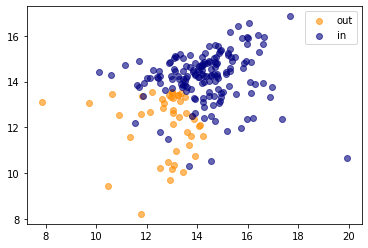

In [17]:
import matplotlib.pyplot as plt
colors = ["darkorange", "navy"]
labels = ["out", "in"]
for flag, color, label in zip(set(y), colors, labels):
    plt.scatter(np.log(X[:, 0][y==flag]), np.log(X[:, 1][y==flag]), alpha=.6, color=color, label=label)
plt.legend()
plt.show()